In [149]:
# Import dependencies:
from pathlib import Path
import pandas as pd

# Part One:
In this part, we will analyze cryptocurrencies as an investment option and we would like to answer the following question:

## Are cryptocurrencies growing in popularity in comparison to the traditional stock market?

We will use historical data of market index SP 500 & gold index aganist our cryptocurrency portfolio that consists of the top 3 currencies, to compare Risk, Returns and Trading Volume.

Input Files we will use to demonstrate the comparison:
1. SP_500
2. GLD_DATA
3. ETH_DATA
4. BTC_DATA
5. XRP_DATA


In [150]:
# Determine csv path for Crypto-folio:
eth_file = Path ('Data/ETH-USD.csv')
btc_file = Path('Data/BTC-USD.csv')
xrp_file = Path('Data/XRP-USD.csv')

# Determine csv path for market indices:
sp500_file = Path('Data/S&P-500.csv')
gld_file = Path('Data/GLD_Data.csv')

# Pass the file to pandas and define the index:
eth_df = pd.read_csv(eth_file, index_col = 'Date', parse_dates=True)
btc_df = pd.read_csv(btc_file, index_col = 'Date', parse_dates=True)
xrp_df = pd.read_csv(xrp_file, index_col = 'Date', parse_dates=True)

# Pass market indices to pandas and define index:
sp500_df = pd.read_csv(sp500_file, index_col = 'Date', parse_dates=True)
gld_df = pd.read_csv(gld_file, index_col = 'Date', parse_dates=True)

In [151]:
# testing the dataframe:
xrp_df.head()
eth_df.head()
btc_df.head()
sp500_df.head()
gld_df.head()

,GLD Close,GLD Volume
Date,,
2015-08-03,104.10,3528596
2015-08-04,104.31,3241016
2015-08-05,103.93,5041015
2015-08-06,104.39,3908124
2015-08-07,104.65,4400915


In [152]:
# Dropping unnecessary columns in crypto-folio:
eth_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)
btc_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)
xrp_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)

# Market index:
sp500_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)

sp500_df.head()

,Close,Volume
Date,,
2015-08-03,2098.040039,3476770000
2015-08-04,2093.320068,3546710000
2015-08-05,2099.840088,3968680000
2015-08-06,2083.560059,4246570000
2015-08-07,2077.570068,3602320000


In [153]:
# Rename columns to reflect each crypto-ticker:
eth_df = eth_df.rename(columns= {'Close':'ETH Close', 'Volume':'ETH Volume'})
btc_df = btc_df.rename(columns= {'Close':'BTC Close', 'Volume':'BTC Volume'})
xrp_df = xrp_df.rename(columns= {'Close':'XRP Close', 'Volume':'XRP Volume'})
sp500_df = sp500_df.rename(columns= {'Close':'S&P500 Close', 'Volume':'S&P500 Volume'})
sp500_df.head()

,S&P500 Close,S&P500 Volume
Date,,
2015-08-03,2098.040039,3476770000
2015-08-04,2093.320068,3546710000
2015-08-05,2099.840088,3968680000
2015-08-06,2083.560059,4246570000
2015-08-07,2077.570068,3602320000


---

In [154]:
# Calculate Daily returns for each ticker:

In [155]:
# ETH RETURNS:
eth_returns=eth_df['ETH Close'].pct_change()
eth_returns.head() # notice name is ETH Close still, need to change but it's a series!

# convert series to dataframe:
eth_returns = eth_returns.to_frame()

# reanme colum & drop null:
eth_returns = eth_returns.rename(columns={'ETH Close':'ETH'})
eth_returns.dropna(inplace=True)
eth_returns.head()

,ETH
Date,
2015-08-08,-0.728249
2015-08-09,-0.068268
2015-08-10,0.009333
2015-08-11,0.507323
2015-08-12,0.140075


In [156]:
# BTC RETURNS:
btc_returns=btc_df['BTC Close'].pct_change()
btc_returns = btc_returns.to_frame()
btc_returns = btc_returns.rename(columns={'BTC Close':'BTC'})
btc_returns.dropna(inplace=True)
btc_returns.head()

,BTC
Date,
2015-08-02,0.003597
2015-08-03,-0.004908
2015-08-04,0.014191
2015-08-05,-0.011696
2015-08-06,-0.011725


In [157]:
# XRP RETURNS:
xrp_returns=xrp_df['XRP Close'].pct_change()
xrp_returns = xrp_returns.to_frame()
xrp_returns = xrp_returns.rename(columns={'XRP Close':'XRP'})
xrp_returns.dropna(inplace=True)
xrp_returns.head()

,XRP
Date,
2015-08-02,0.000973
2015-08-03,0.006197
2015-08-04,-0.001208
2015-08-05,-0.005683
2015-08-06,-0.024319


In [158]:
# SP500 RETURNS:
sp500_returns = sp500_df['S&P500 Close'].pct_change()
sp500_returns = sp500_returns.to_frame()
sp500_returns = sp500_returns.rename(columns={'S&P500 Close':'S&P500'})
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,S&P500
Date,
2015-08-04,-0.002250
2015-08-05,0.003115
2015-08-06,-0.007753
2015-08-07,-0.002875
2015-08-10,0.012808


In [159]:
# GLD RETURNS:
gld_returns = gld_df['GLD Close'].pct_change()
gld_returns = gld_returns.to_frame()
gld_returns = gld_returns.rename(columns={'GLD Close':'GLD'})
gld_returns.dropna(inplace=True)
gld_returns.head()

,GLD
Date,
2015-08-04,0.002017
2015-08-05,-0.003643
2015-08-06,0.004426
2015-08-07,0.002491
2015-08-10,0.010225


In [160]:
# Concat all dataframes to extract volume data only:
crypto= pd.concat([btc_df, eth_df, xrp_df, sp500_df, gld_df], axis='columns', join='inner')
crypto.head()

,BTC Close,BTC Volume,ETH Close,ETH Volume,XRP Close,XRP Volume,S&P500 Close,S&P500 Volume,GLD Close,GLD Volume
Date,,,,,,,,,,
2015-08-07,279.584991,42484800,2.772120,164329,0.008152,363643,2077.570068,3602320000,104.65,4400915
2015-08-10,264.470001,20979400,0.708448,405283,0.008750,472973,2104.179932,3514460000,105.72,5892602
2015-08-11,270.385986,25433900,1.067860,1463100,0.008591,282461,2084.070068,3708880000,106.26,4060892
2015-08-12,266.376007,26815400,1.217440,2150620,0.008271,287463,2086.050049,4269130000,107.75,10022547
2015-08-13,264.079987,27685500,1.827670,4068680,0.008147,202934,2083.389893,3221300000,106.86,4761682


In [161]:
# dataframe that has only volume for each ticker:
crypto_vol = crypto.drop(columns=['BTC Close', 'ETH Close', 'XRP Close', 'S&P500 Close',])
crypto_vol.head()

,BTC Volume,ETH Volume,XRP Volume,S&P500 Volume,GLD Close,GLD Volume
Date,,,,,,
2015-08-07,42484800,164329,363643,3602320000,104.65,4400915
2015-08-10,20979400,405283,472973,3514460000,105.72,5892602
2015-08-11,25433900,1463100,282461,3708880000,106.26,4060892
2015-08-12,26815400,2150620,287463,4269130000,107.75,10022547
2015-08-13,27685500,4068680,202934,3221300000,106.86,4761682


---

# OUTPUTS

## Daily returns for Market Index & Crypto-folio

In [162]:
crypto_folio= pd.concat([btc_returns, eth_returns, xrp_returns, sp500_returns, gld_returns], axis='columns', join='inner')
crypto_folio.head()

,BTC,ETH,XRP,S&P500,GLD
Date,,,,,
2015-08-10,-0.002313,0.009333,-0.006585,0.012808,0.010225
2015-08-11,0.022369,0.507323,-0.018171,-0.009557,0.005108
2015-08-12,-0.014831,0.140075,-0.037248,0.000950,0.014022
2015-08-13,-0.008619,0.501240,-0.014992,-0.001275,-0.008260
2015-08-14,0.006059,0.000109,0.023321,0.003912,-0.000094


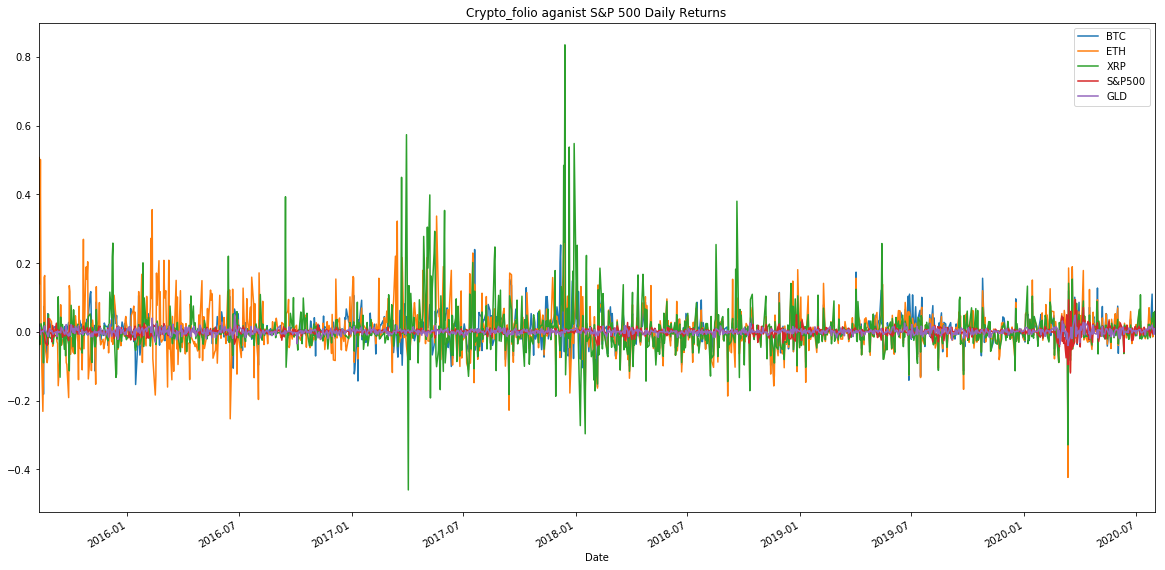

In [163]:
# Visualizing Daily returns for each:
%matplotlib inline
crypto_folio.plot(title="Crypto_folio aganist S&P 500 Daily Returns", figsize=(20,10))

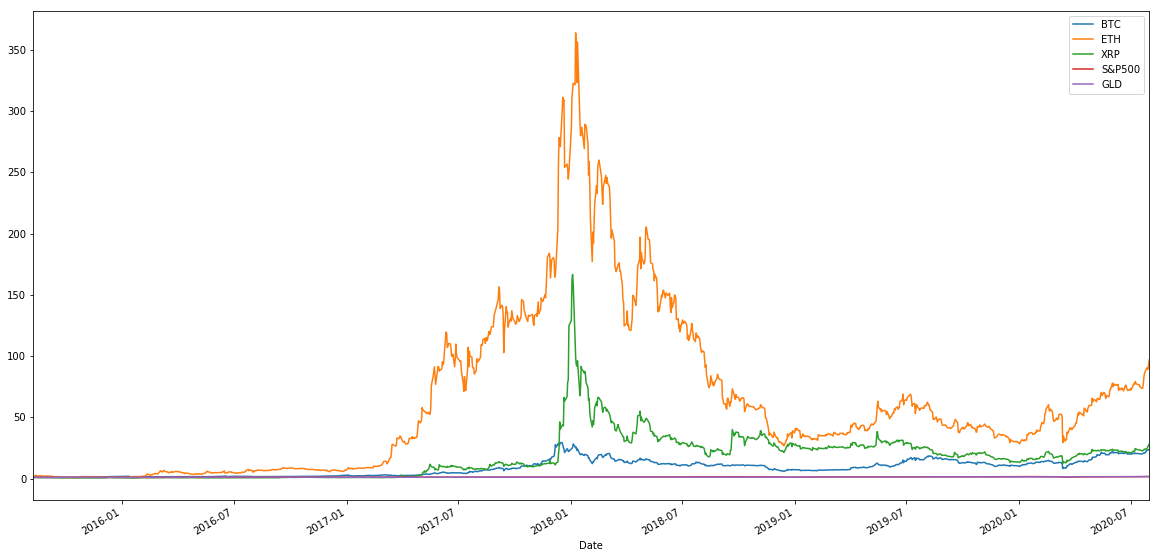

In [164]:
cum_returns = (1 + crypto_folio).cumprod()
cum_returns.plot(figsize=(20,10))

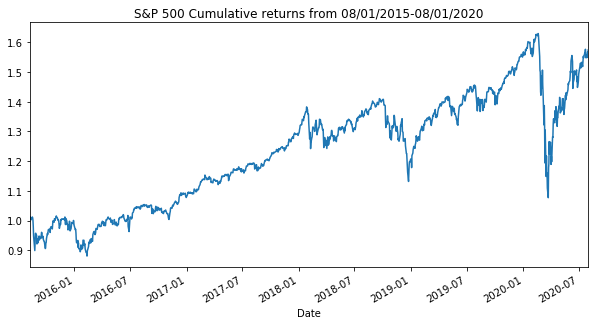

In [165]:
cum_returns['S&P500'].plot(figsize=(10,5), title='S&P 500 Cumulative returns from 08/01/2015-08/01/2020')

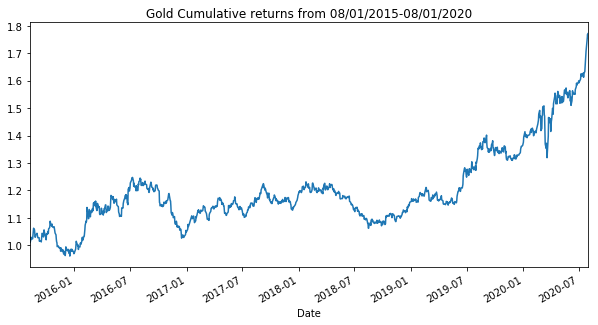

In [166]:
cum_returns['GLD'].plot(figsize=(10,5), title='Gold Cumulative returns from 08/01/2015-08/01/2020')

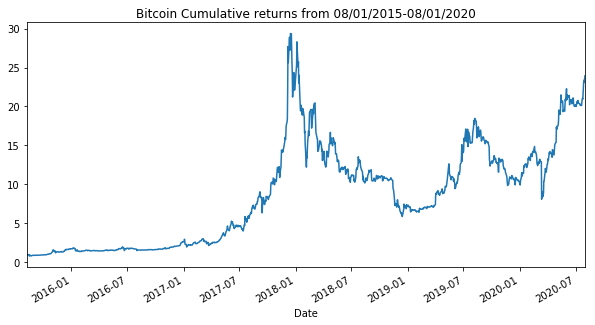

In [167]:
cum_returns['BTC'].plot(figsize=(10,5), title='Bitcoin Cumulative returns from 08/01/2015-08/01/2020')

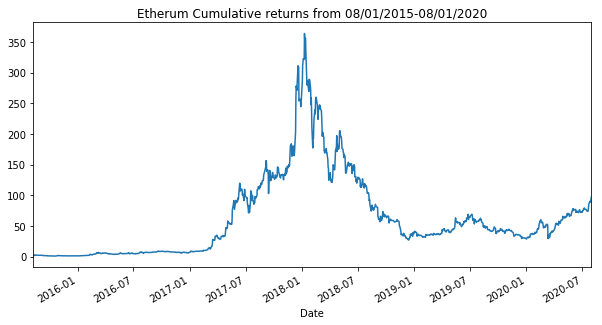

In [168]:
cum_returns['ETH'].plot(figsize=(10,5), title='Etherum Cumulative returns from 08/01/2015-08/01/2020')

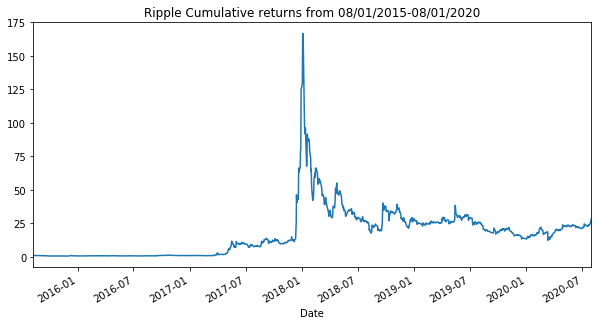

In [169]:
cum_returns['XRP'].plot(figsize=(10,5), title='Ripple Cumulative returns from 08/01/2015-08/01/2020')

In [193]:
# let's look at the numbers & see my investment returns if we started with $ 5000 in each:
btc = cum_returns['BTC'].iloc[-1] *5000
eth = cum_returns['ETH'].iloc[-1] *5000
xrp = cum_returns['XRP'].iloc[-1] *5000
sp_500 = cum_returns['S&P500'].iloc[-1] *5000
gld = cum_returns['GLD'].iloc[-1] *5000

print(f'If $ 5000 was invested in Bitcoin, I would end up after 5 years with'  f' $ {round(btc,2)}')
print(f'If $ 5000 was invested in Etherum, I would end up after 5 years with' f' $ {round(eth,2)}')
print(f'If $ 5000 was invested in Ripple, I would end up after 5 years with' f'  $ {round(xrp,2)}')
print(f'If $ 5000 was invested in Gold, I would end up after 5 years with' f'  $ {round(gld,2)}')
print(f'If $ 5000 was invested in S&P 500, I would end up after 5 years with' f'  $ {round(sp_500,2)}')

If $ 5000 was invested in Bitcoin, I would end up after 5 years with $ 119720.1
If $ 5000 was invested in Etherum, I would end up after 5 years with $ 485795.76
If $ 5000 was invested in Ripple, I would end up after 5 years with  $ 142216.29
If $ 5000 was invested in Gold, I would end up after 5 years with  $ 8859.53
If $ 5000 was invested in S&P 500, I would end up after 5 years with  $ 7872.47


In [194]:
daily_std = crypto_folio.std().sort_values(ascending=True)
daily_std

GLD       0.008474
S&P500    0.012239
BTC       0.042398
ETH       0.068130
XRP       0.074356
dtype: float64

In [37]:
import numpy as np
Annualized_std = daily_std * np.sqrt(252*5)
Annualized_std

S&P500    0.434442
BTC       1.504968
ETH       2.418386
XRP       2.639372
dtype: float64

In [38]:
# show the relationship accross the chosen platform:
correlation = crypto_folio.corr()
correlation

,BTC,ETH,XRP,S&P500
BTC,1.000000,0.473789,0.355066,0.147120
ETH,0.473789,1.000000,0.332140,0.138930
XRP,0.355066,0.332140,1.000000,0.111459
S&P500,0.147120,0.138930,0.111459,1.000000


In [39]:
sharpe_ratio = (crypto_folio.mean() * 252) / (crypto_folio.std() * np.sqrt(252))
sharpe_ratio

BTC       1.290668
ETH       1.375713
XRP       1.104044
S&P500    0.567319
dtype: float64

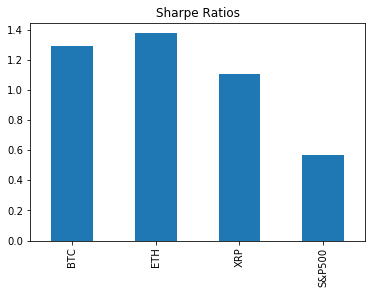

In [40]:
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

In [41]:
sharpe_ratio = (crypto_folio.mean() * 252*5) / (crypto_folio.std() * np.sqrt(252*5))
sharpe_ratio

BTC       2.886021
ETH       3.076189
XRP       2.468717
S&P500    1.268563
dtype: float64

289%
308%
247%
127%


129%
138%
110%
57%


In [42]:
# compare trading volume use loop to iterate each row 

In [43]:
crypto_vol.head()

,BTC Volume,ETH Volume,XRP Volume,S&P500 Volume
Date,,,,
2015-08-07,42484800,164329,363643,3602320000
2015-08-10,20979400,405283,472973,3514460000
2015-08-11,25433900,1463100,282461,3708880000
2015-08-12,26815400,2150620,287463,4269130000
2015-08-13,27685500,4068680,202934,3221300000
